<a href="https://colab.research.google.com/github/yoonputer/Team_Project2/blob/master/Deeplearning/test_dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 설치

konlpy


In [ ]:
! ls ./drive/MyDrive/Forkspoon/dummy1.xlsx

In [ ]:
!python -m pip install konlpy

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!source ./mecab.sh

## 데이터 가져오기

In [ ]:
!ls ./drive/MyDrive/Forkspoon/db.sqlite3

In [6]:
import sqlite3
import pandas as pd
connect = sqlite3.connect('./drive/MyDrive/Forkspoon/db.sqlite3')

In [7]:
choice = pd.read_sql_query('select * from write_choice',connect)

In [8]:
type(choice)
choice_cols = choice[['점수','질문','답변']]
choice_cols

,점수,질문,답변
0,2.0,입사 지원동기를 작성해주세요. (① 지원 부문을 선택한 이유와 ② 지원 부문과 관련...,"\n경영은 전사의 콘텐츠 제작에서부터 유통 과정을 파악하고, 설정한 목표를 이루기 ..."
1,3.0,"우리 공단에 지원동기와 직무를 선택한 이유, 입사 후 목표와 포부를 기술해 주십시오...","\n""‘재료’를 전공하며 나의 가치를 증명하다""\n 제조업은 우리나라 경제의 주요 ..."
2,2.0,"지원직무를 선택한 이유를(직무와 관련한 경험, 전공, 수강과목, 자격증 등을 포함하...","\n""직접 만든다는 것""\n 실습을 위해 콤부차를 조사하였습니다. 한정된 자료에서 ..."
3,2.0,본인이 선택한 직무에 대해 아래 내용을 포함하여 기술하시오. ①지원한 직무의 역할이...,\n`전지적 참견 시점`\n 영업관리 직무는 BGF리테일의 점포 관리를 위한 매니저...
4,4.0,"본인이 선택한 직무를 담당하고 싶은 이유, 적합성 등에 대해 자유롭게 설명해 보십시...",\n16살에 처음 회계를 접하고 흥미를 느껴 뚜렷한 진로 방향을 형성했습니다.\n기...
...,...,...,...
2992,2.0,화천그룹 및 해당분야 지원동기최소 (30~400),"\n공작기계분야에 있어서 두산인프라코어, 현대위아와 어깨를 나란히 하는 화천기계는 ..."
2993,4.0,지원동기 및 입사 후 포부,"\n(`마트`라는 채널에서 보고 느낀 영업사원들의 모습)\n마트에서 일하면서 판매,..."
2994,4.0,직무 지원동기,"\n<사람을 좋아하는 마음, 경험과 지식을 통해 또 다른 가치를 만들다> \n새로운..."
2995,5.0,LG디스플레이 및 지원 직무에 지원하는 동기에 대해 기술해 주십시오. 성격(장단점)...,\n‘2015 나노 코리아’에서 LG OLED UHD TV를 보고 말을 잃었습니다....


## NLP 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_data = choice_cols['답변']
y_data = choice_cols['점수']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((2247,), (2247,), (750,), (750,))

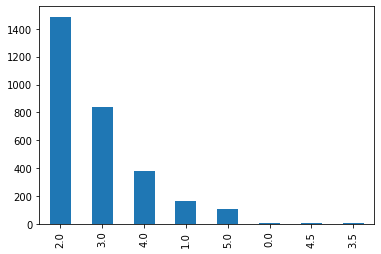

In [12]:
y_data.value_counts().plot(kind='bar')

In [13]:
type(x_train)

pandas.core.series.Series

In [14]:
x_temp = x_train
x_temp= x_temp.str.replace('[^가-힣ㄱ-ㅎ0-9ㅏ-ㅣ]','')
x_temp

1859    중소기업은한국가의성장동력으로서부가가치와고용창출에크게기여합니다이에중소기업의든든한금융뒷...
2650    가치를만드는사람우미건설은주택과건축물그리고사회기반시설의개발을통해많은사람에게가치를만들어...
450     당연하다고생각했던전력공급고등학교1학년때에12년간살아온아파트를떠나새로운아파트로이사를하...
1912    유통업에관한관심으로유통과영업관리업무를직접배우고자관련인턴에도전했습니다직접매장에서부딪히...
2586    삼성생명이라는거대한기업의타이틀보다는내자신의꿈을위해지원하다삼성생명이라는큰조직하에근무를...
                              ...                        
2139    준비된효성효성산업자재의똑부러지는연구원이되기위하여다음과같은역량을길렀습니다첫번째는재료공...
1529    실무경험을통해배운생산기술저의역량과지식을가장효과적으로사용될수있는곳은전자생산기술직무라고...
895     글로벌한아름다움실현고객의아름다움을실현하는일을하고싶습니다주위사람들이피부관리법에대해물으...
1120    성공은습관이다성공은습관이다는제모토이자습관처럼성공을거머쥐는그룹을가장잘나타내는문구라고생...
2744    여자라면누구나뷰티에대한관심과욕심을가지고있기마련입니다용돈을아껴모은네일컬러가100개를넘...
Name: 답변, Length: 2247, dtype: object

### stopwords

```
import pandas as pd

lst_A = ['a','b','c','d', 'e', 1, 2]
df = pd.DataFrame(lst_A)

df.columns=['']

import numpy as np

np.array(df[0].tolist())
```

In [15]:
stopwords = pd.read_sql_query('select * from stopwords',connect)

stopwords.describe()

type(stopwords)

pandas.core.frame.DataFrame

In [16]:
import numpy as np

ko_stopwords_list = np.array(stopwords['words'].tolist())
ko_stopwords_list

array(['이', '있', '하', ..., '잘', '통하', '놓'], dtype='<U4')

### Mecab

In [17]:
from konlpy.tag import Mecab
mecab= Mecab()

In [ ]:
# mecab.pos(x_temp[0])
mecab.morphs(x_temp[0])

In [19]:
def non_stopwords(x_temp):
  sentance = list ()
  
  for tok in x_temp:
    encoded = mecab.morphs(tok)

    sentance.append([item for item in encoded if item not in ko_stopwords_list])

  return sentance

## Tokenizer

In [20]:
import tensorflow as tf

In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [22]:
tokenizer.fit_on_texts(non_stopwords(x_temp))

In [ ]:
tokenizer.word_index

In [ ]:
tokenizer.word_counts

In [25]:
total_cnt = len(tokenizer.word_index)

In [26]:
rare_cnt = 0
total_freq,rare_freq = 0,0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value #전체 단어의 수
  if(value <=2):
    rare_cnt = rare_cnt+ 1  
    rare_freq = rare_freq + value #2미만인 단어(희귀단어)의 수

In [27]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(16304, 8577, 52.606722276741905, 3.6126855158405133)

In [28]:
vocab_size = total_cnt - rare_cnt #보케블러리 사이즈
vocab_size 

7727

In [29]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [30]:
tokenizer.fit_on_texts(non_stopwords(x_temp))

In [ ]:
tokenizer.index_word

## To int 


In [32]:
x_train = tokenizer.texts_to_sequences(non_stopwords(x_temp))

In [33]:
len(x_train[0]),len(x_train[40]),len(x_train[50])

(99, 223, 56)

In [34]:
hist_len = [len(words) for words in x_train]

In [35]:
import matplotlib.pyplot as plt

(array([  6.,   2.,  11.,  29.,  59.,  82., 131., 185., 290., 237., 206.,
        178., 155., 123.,  84.,  88.,  93.,  90.,  75.,  43.,  10.,   9.,
          8.,  11.,   5.,   7.,   3.,   2.,   1.,   7.,   3.,   2.,   1.,
          4.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  5.  ,  16.48,  27.96,  39.44,  50.92,  62.4 ,  73.88,  85.36,
         96.84, 108.32, 119.8 , 131.28, 142.76, 154.24, 165.72, 177.2 ,
        188.68, 200.16, 211.64, 223.12, 234.6 , 246.08, 257.56, 269.04,
        280.52, 292.  , 303.48, 314.96, 326.44, 337.92, 349.4 , 360.88,
        372.36, 383.84, 395.32, 406.8 , 418.28, 429.76, 441.24, 452.72,
        464.2 , 475.68, 487.16, 498.64, 510.12, 521.6 , 533.08, 544.56,
        556.04, 567.52, 579.  ]),
 <a list of 50 Patch objects>)

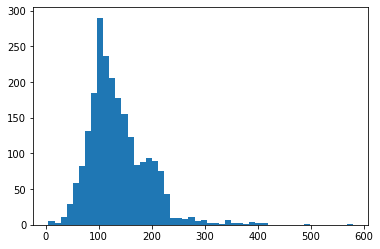

In [36]:
plt.hist(hist_len, bins=50)

- Pad 몇정도 하면 좋을지 여기서 확인

In [37]:
sum(hist_len)/ len(x_train)

135.83889630618603

In [38]:
x_train =tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300)

In [39]:
x_train

array([[   0,    0,    0, ...,    8, 5329, 5330],
       [   0,    0,    0, ...,    8, 4188,    1],
       [   0,    0,    0, ...,    8, 4687,    1],
       ...,
       [   0,    0,    0, ...,    8, 2298, 5572],
       [   0,    0,    0, ...,    8, 3906, 7311],
       [   0,    0,    0, ...,    8, 2298, 3778]], dtype=int32)

In [40]:
len(y_train)

2247

In [41]:
np.unique(y_train)

array([0. , 1. , 2. , 3. , 3.5, 4. , 4.5, 5. ])

In [42]:
type(y_train)

pandas.core.series.Series

In [43]:
len(x_train), len(y_train)

(2247, 2247)

## Model

In [44]:
model = tf.keras.models.Sequential()

In [45]:
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim =30 ,input_length=300))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(8,activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.3, shuffle=True)

```
Epoch 95/100
7/7 [==============================] - 19s 3s/step - loss: 0.0079 - acc: 0.9955 - val_loss: 3.3796 - val_acc: 0.4652
Epoch 96/100
7/7 [==============================] - 19s 3s/step - loss: 0.0079 - acc: 0.9949 - val_loss: 3.3681 - val_acc: 0.4667
Epoch 97/100
7/7 [==============================] - 19s 3s/step - loss: 0.0077 - acc: 0.9949 - val_loss: 3.3706 - val_acc: 0.4711
Epoch 98/100
7/7 [==============================] - 19s 3s/step - loss: 0.0074 - acc: 0.9955 - val_loss: 3.4164 - val_acc: 0.4726
Epoch 99/100
7/7 [==============================] - 19s 3s/step - loss: 0.0075 - acc: 0.9949 - val_loss: 3.4067 - val_acc: 0.4681
Epoch 100/100
7/7 [==============================] - 19s 3s/step - loss: 0.0073 - acc: 0.9949 - val_loss: 3.4006 - val_acc: 0.4622
```

## Evaluation


In [47]:
model.evaluate(x_train, y_train) #loss: 0.0092 - acc: 0.9955 - val_loss: 4.2936 - val_acc: 0.4133

71/71 [==============================] - 8s 113ms/step - loss: 1.0264 - acc: 0.8349


[1.026362419128418, 0.8348909616470337]

## Service

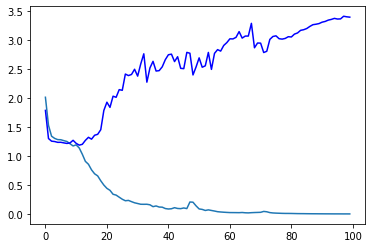

In [49]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

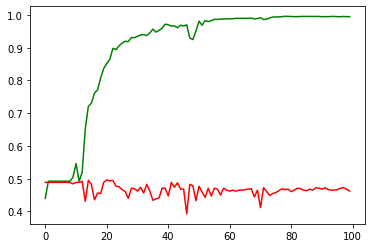

In [50]:
plt.plot(hist.history['acc'],'g-')
plt.plot(hist.history['val_acc'],'r-')
plt.show()

In [51]:
model.save('./test_dummy_LSTM.h5')